In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


### Projeto Student_Perfomance Kaggle

## Introdução

    Neste projeto, o objetivo era realizar a análise de dados das estudantes e como as variáveis se comportavam entre si. Inicialmente, foi feita a visualização e análise utilizando Python. Posteriormente, também foi realizada uma análise e visualização utilizando a ferramenta Power BI, com o propósito de estudo e demonstração das minhas habilidades na sua utilização.
    O Dataset se encontra no kaggle no site [Kaggle](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)e no meu Github.

In [2]:
df = pd.read_csv("data/Student_Performance.csv")

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


## Explicando o código e Visualização
1.  Primeiramente, no código Python, realizei a verificação de valores nulos no conjunto de dados. Em seguida, converti a variável 'Extracurricular Activities' para um formato numérico, a fim de facilitar sua manipulação.

2. Elaborei uma matriz de correlação para identificar quais variáveis estão principalmente relacionadas linearmente com a variável que desejo analisar, o 'Performance Index'. As variáveis 'Hours Studied' e 'Previous Score' apresentaram as maiores correlações
 

In [4]:
#check null values
df.isnull().sum() 

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
##extracurricular[yes or no] --> change to 1 or 0
df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x: 1 if(x == 'Yes') else 0)

In [6]:
##visualization
matrixcorr = df.corr()

Text(0.5, 1.0, 'Matrix Correlação')

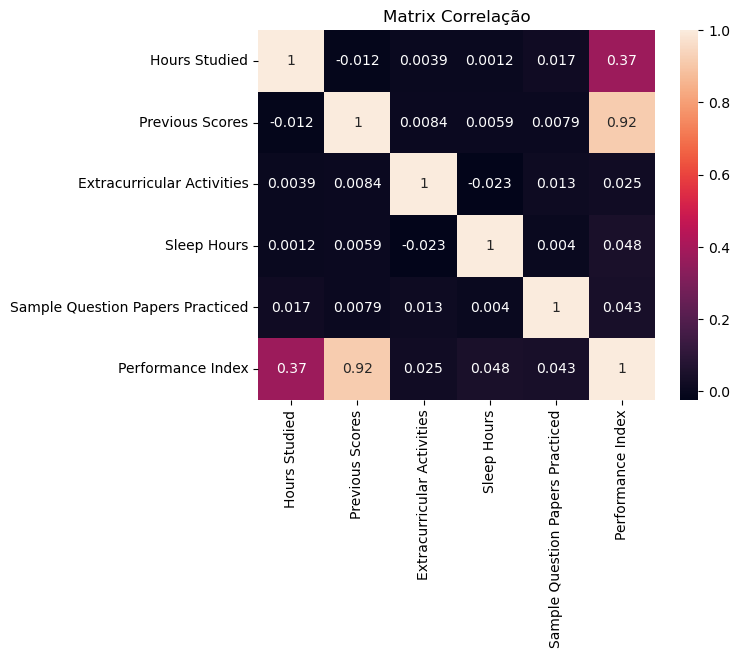

In [7]:
sns.heatmap(matrixcorr, annot = True)
plt.title('Matrix Correlação')

In [8]:
##hours studied and previous scores seems to have corr with perfomance**

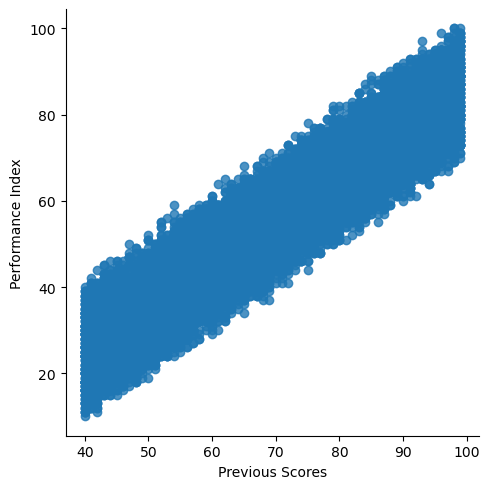

In [9]:
sns.lmplot(data = df,x = 'Previous Scores', y = 'Performance Index')

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

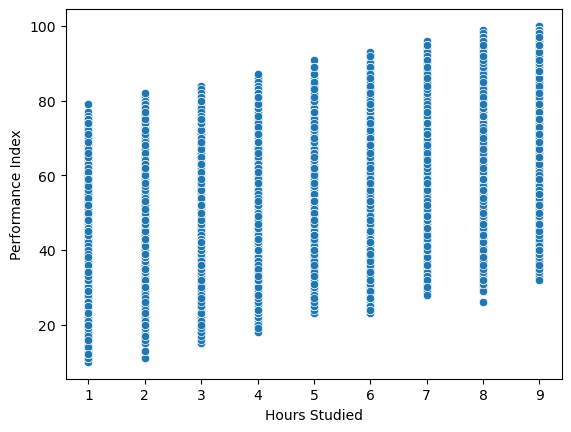

In [10]:
sns.scatterplot(x = df['Hours Studied'], y = df['Performance Index'])

### Visualização
3. Ao visualizar os meus dados, observei uma clara relação linear entre 'Previous Score' e 'Performance Index', que pode até mesmo ser considerada forjada. Além disso, criei um gráfico de dispersão ('scatterplot') para 'Performance Index' e 'Hours Studied', identificando uma clara relação linear entre essas duas variáveis.

4. Plotei um gráfico semelhante com 'Previous Score' e 'Performance Index', mas desta vez segmentando por 'Hours Studied'. Parece possível identificar um padrão que sugere a possível utilização de apenas duas variáveis na criação do conjunto de dados."

\[
 f(x,y) = (a.x + b) + c.y
\]

- Sendo as variaveis
    - x =  'Previous Scores'             
    - y = 'Hours Studied'
    - f(x,y) = 'Performance Index'   

Text(0.5, 1.0, "'Previous Scores' 'Perfomance Index' separados por 'Hours Studied'")

<Figure size 1600x900 with 0 Axes>

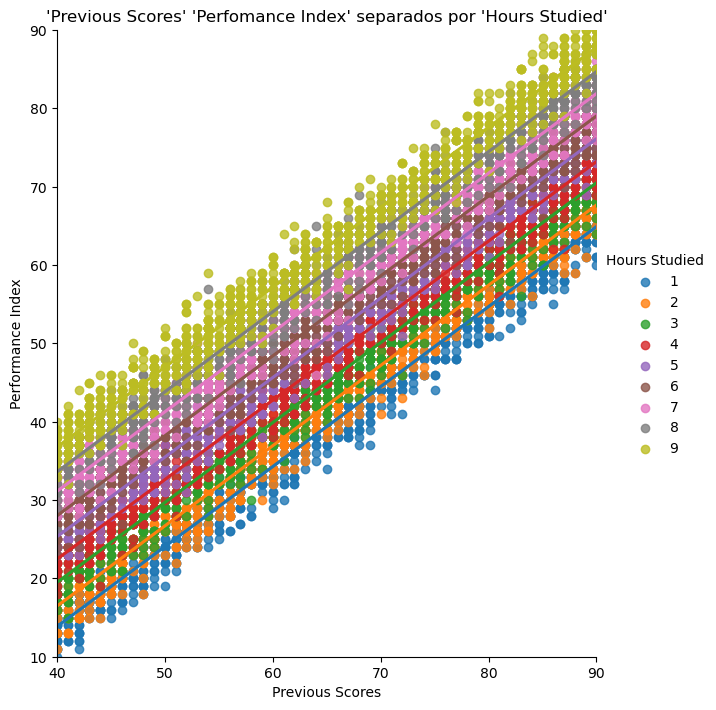

In [11]:
plt.figure(figsize=(16, 9))
sns.lmplot(data = df,x = 'Previous Scores', y = 'Performance Index', hue = 'Hours Studied', height=7, aspect = 0.9)
plt.xlim([40, 90])
plt.ylim([10, 90])
plt.title("'Previous Scores' 'Perfomance Index' separados por 'Hours Studied'")

### Machine Learning do dataset

Dado que o dataset parece ser bastante simples, optei por utilizar apenas duas variáveis na modelagem e previsão do 'Performance Index'. Além disso, há indícios de um comportamento fortemente linear, o que me levou a empregar o algoritmo de regressão linear na biblioteca do scikit-learn.

1. Inicialmente, dividi os dados em conjuntos de treinamento e teste, sendo o y = 'Performance Index' e o X = 'Previous Scores' e 'Hours Studied'

2. Em seguida, apliquei o modelo de regressão linear e ajustei os dados.
 
3. Criei um gráfico de dispersão comparando os valores previstos com os valores de teste, e notei uma discrepância mínima nos erros.

4. Para quantificar o erro, calculei o erro absoluto médio, que resultou em um valor de aproximadamente 1.8 para o 'Performance Index'. O erro parece ser baixo, e o modelo parece ter uma precisão significativa quando comparado à média dos valores do y_test, que é de 55, com um desvio padrão de 19.

Resultados para o y_test:
- Média = 19 
- σ = 19
- mean absolute error (MAE) = 18


Valores da regressão linear e função que descreve o modelo do dataset
- a = 1.0186
- b = -29.816
- c = 2.860

\[
 f(x,y) = (1.0186.x + -29.816) + 2.860.y
\]

- Sendo as variaveis
    - x =  'Previous Scores'             
    - y = 'Hours Studied'
    - f(x,y) = 'Performance Index'       



In [12]:
y = df['Performance Index']
X = df[['Previous Scores','Hours Studied']]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model = model.fit(X = X_train,y = y_train)

In [17]:
predict = model.predict(X_test)

Text(0.5, 1.0, 'predict = y_test')

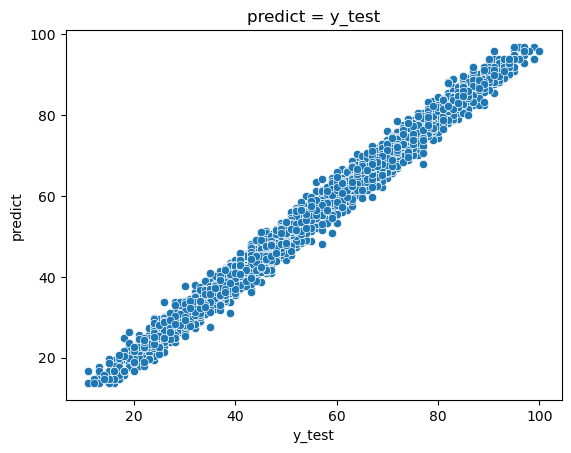

In [18]:
sns.scatterplot(x = y_test.values, y = predict) ##seems very accurate
plt.xlabel('y_test')
plt.ylabel('predict')
plt.title('predict = y_test')

In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
erromedio = mean_absolute_error(y_true=y_test.values,y_pred=predict)
erromedio

1.797193394861737

In [21]:
np.std(y_test.values)

19.055857699725205

In [22]:
np.mean(y_test.values)

55.03545454545455

In [23]:
intercepto = model.intercept_
coeficiente_angular = model.coef_
print("Coeficiente Angular:", coeficiente_angular)
print("Intercepto:", intercepto)

Coeficiente Angular: [1.01869044 2.8607863 ]
Intercepto: -29.816295803711704


In [24]:
#a*x + b + c*y function
m = 200
n = 9
x = np.linspace(0, 100, m)
y = np.linspace(1, 9, n)

In [25]:
fxy = np.ones([n,m])

In [26]:
a , c = coeficiente_angular
b = intercepto

In [27]:
for n in range(1, 10):
    fxy[n-1] = a*x + c*n + b

In [28]:
def pltfuncmodel():
    for n in range(1, 10):
        lab = 'Model Hours Studied'+' '+str(n)
        plt.plot(x, fxy[n-1], label = lab)

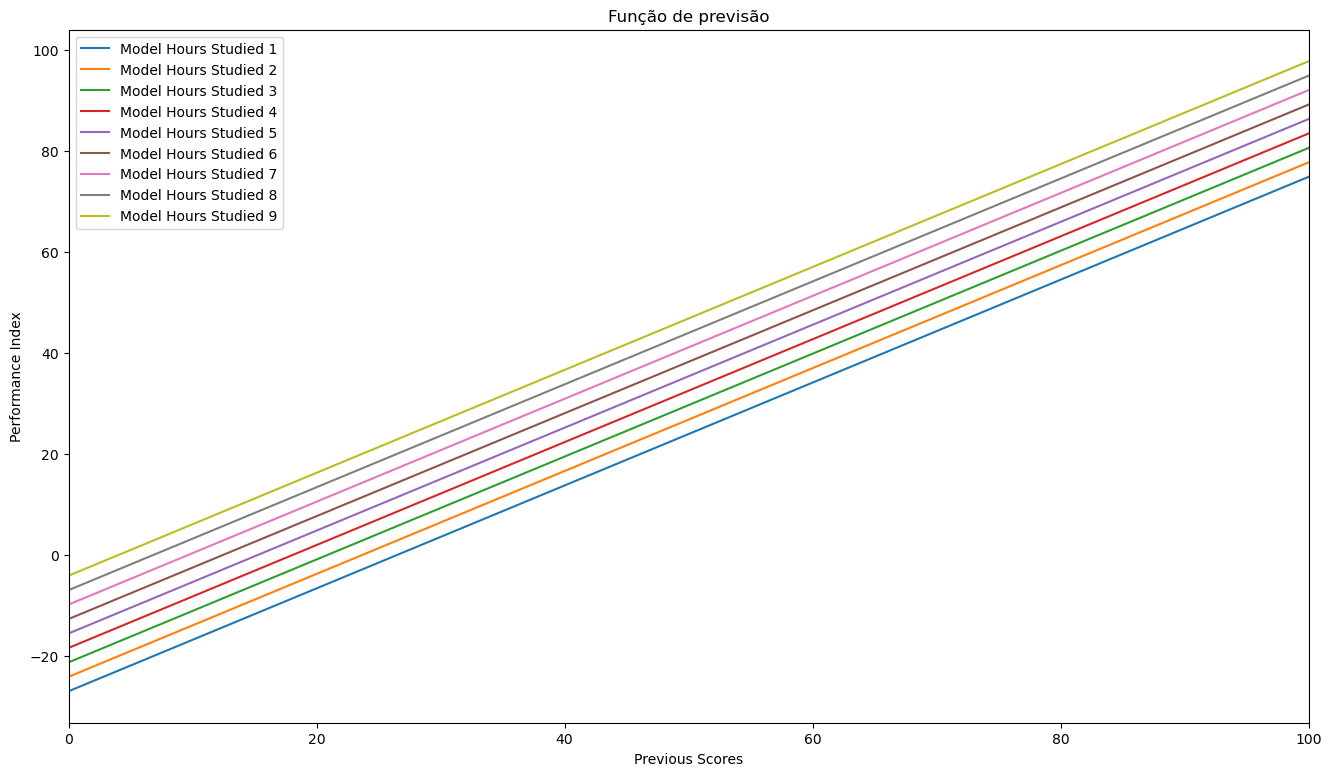

In [29]:
plt.figure(figsize=(16, 9))
pltfuncmodel()
plt.xlim([0, 100])
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Função de previsão')
plt.legend()##função previsão

Text(0.5, 1.0, 'Função de previsão e Dataset')

<Figure size 1600x900 with 0 Axes>

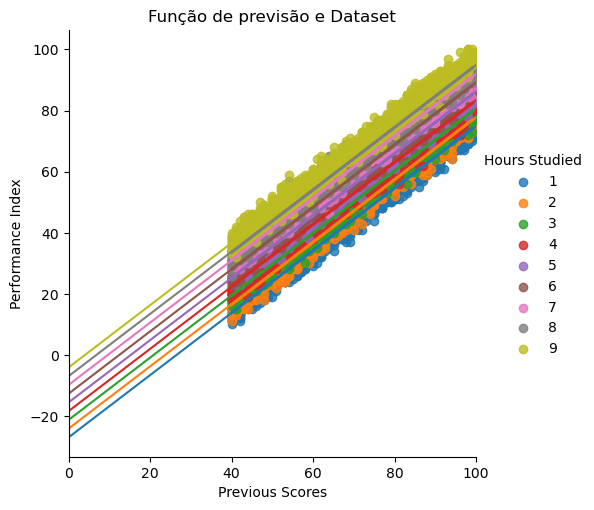

In [30]:
plt.figure(figsize=(16, 9)) 
sns.lmplot(data = df,x = 'Previous Scores', y = 'Performance Index', hue = 'Hours Studied')
plt.xlim([0, 100])
pltfuncmodel()
plt.title('Função de previsão e Dataset')